In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,r2_score, max_error

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Load your dataset
df = pd.read_csv("/content/drive/My Drive/content/carpricedata.csv")  # Replace with  dataset

In [33]:
df.info()  #to check the information of your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [34]:
df #to display the dataframe

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [35]:
missing_values = df.isnull().sum()
missing_values

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [36]:
df= df.dropna(axis=0)    #the row with NaN values will be removed

def convertToNumber(s):
  try:
    s = str(s)   #convert value to string
    d = ""       #Empty string to collect digits
    for i in list(s):
        if i.isdigit():
            d += i   #add only digits to d
    return int(d)    #convert the collected digits to integer
  except (TypeError, ValueError):
    return s


df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].apply(convertToNumber)
df["engine"] = df["engine"].apply(convertToNumber)
df["max_power"] = df["max_power"].apply(convertToNumber)
df["seats"] = df["seats"].apply(convertToNumber)

In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,12480,74,50
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,14980,10352,50
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,14970,78,50
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,13960,90,50
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,12980,882,50


In [38]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [39]:
df = df.drop(['seller_type','name','owner'],axis=1)   #remove the useless columns
df.head()

,year,selling_price,km_driven,fuel,transmission,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,234,12480,74,50
1,2014,370000,120000,Diesel,Manual,2114,14980,10352,50
2,2006,158000,140000,Petrol,Manual,177,14970,78,50
3,2010,225000,127000,Diesel,Manual,230,13960,90,50
4,2007,130000,120000,Petrol,Manual,161,12980,882,50


In [40]:
df.fuel.unique()    #.unique used for see all possible types in the column

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [41]:
df_new = pd.get_dummies(df, columns=['fuel'], drop_first=True, dtype=int)      #drop_first=True means we remove one column (to avoid confusion for the machine learning model).
                                                                               #get_dummies to Converts the fuel column into new columns like fuel_Diesel, fuel_Petrol, etc.

In [42]:
df_new.head()

,year,selling_price,km_driven,transmission,mileage(km/ltr/kg),engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,Manual,234,12480,74,50,1,0,0
1,2014,370000,120000,Manual,2114,14980,10352,50,1,0,0
2,2006,158000,140000,Manual,177,14970,78,50,0,0,1
3,2010,225000,127000,Manual,230,13960,90,50,1,0,0
4,2007,130000,120000,Manual,161,12980,882,50,0,0,1


In [43]:
df_new['transmission'] = df_new['transmission'].replace({'Automatic': 1, 'Manual': 0})   #changing the text values in the 'transmission' column into numbers
df_new.head()

,year,selling_price,km_driven,transmission,mileage(km/ltr/kg),engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,0,234,12480,74,50,1,0,0
1,2014,370000,120000,0,2114,14980,10352,50,1,0,0
2,2006,158000,140000,0,177,14970,78,50,0,0,1
3,2010,225000,127000,0,230,13960,90,50,1,0,0
4,2007,130000,120000,0,161,12980,882,50,0,0,1


In [44]:
#preprocessing tools that help prepare data for machine learning: scaling and encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
mmScaler = MinMaxScaler()
mmScaler_y = MinMaxScaler()

label_enc = LabelEncoder()

x = df_new[['year', 'km_driven','transmission', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']].values
y = df_new[['selling_price']].values     #preparing input and output and scaling them using minmaxscalar

In [45]:
# Encode every column that is 'object' (string)
for col in range(x.shape[1]):   #x.shape[1] means number of columns in input data
    if x[:, col].dtype == object:   #check col has text                                                    #in this cell check wheather there is obj or str. if yes convert str to numeric using label encoder and saved in x
      x[:, col] = x[:, col].astype(str)   # convert the column to string
      x[:, col] = LabelEncoder().fit_transform(x[:, col])

# Convert to float (important)
x = x.astype(float)   #x is converted to float

x[:,0] = label_enc.fit_transform(x[:,0])    #apply labelencode to 1st column
x = mmScaler.fit_transform(x)    #scale all values between 0 and 1 using minmax scalar
y = mmScaler_y.fit_transform(y)  #scaled target values

In [46]:
#checking how each numeric value is related to selling price
import plotly.graph_objects as go

# Keep only numeric columns for correlation
correlation_matrix = df_new.select_dtypes(include=[float, int]).corr()

# Create the heatmap
corr = go.Heatmap(
    z = correlation_matrix.values,
    x = correlation_matrix.columns,
    y = correlation_matrix.columns,
    colorscale='RdYlBu',
    colorbar=dict(title='Correlation')
)

layout = go.Layout(
    title='Heatmap of Correlation',
    xaxis=dict(title='Columns'),
    yaxis=dict(title='Columns'),
    height=800
)

fig = go.Figure(data=corr, layout=layout)
fig.show()


In [47]:
# Select only numeric columns
df_numeric = df_new.select_dtypes(include=[float, int])

# Now calculate correlation with 'selling_price'
correlations = df_numeric.corrwith(df_numeric['selling_price'])

correlations


,0
year,0.412268
selling_price,1.000000
km_driven,-0.222196
transmission,0.590279
mileage(km/ltr/kg),0.099060
engine,0.455734
seats,0.041358
fuel_Diesel,0.204906
fuel_LPG,-0.035971
fuel_Petrol,-0.194979


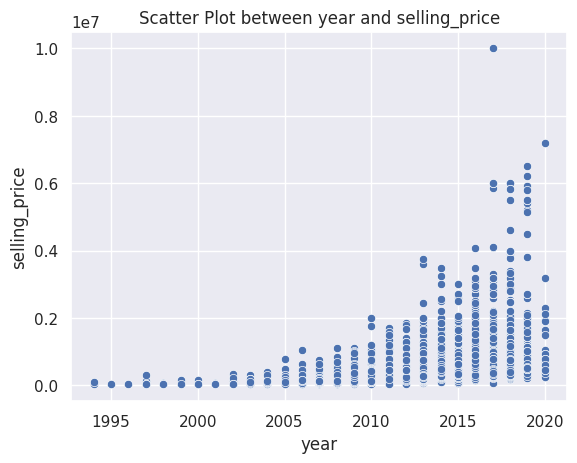

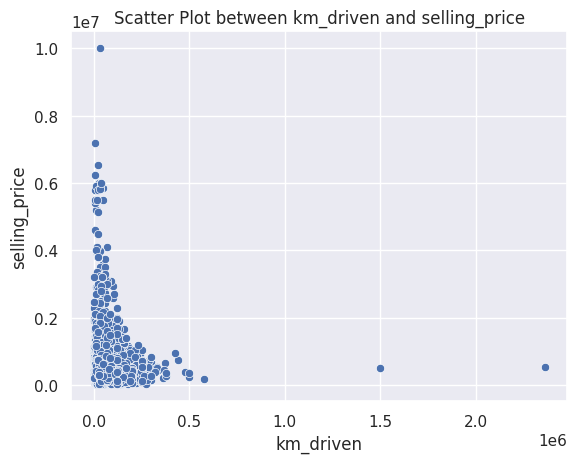

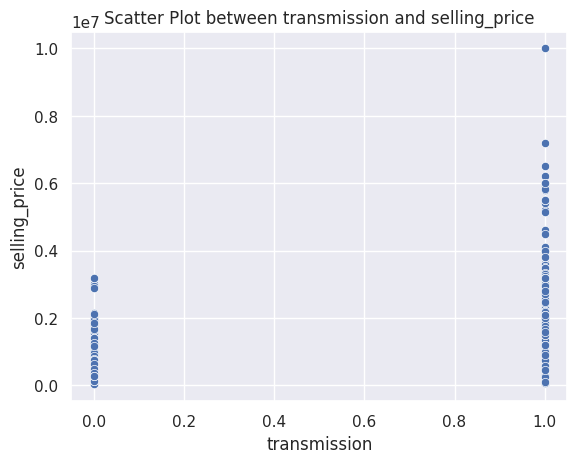

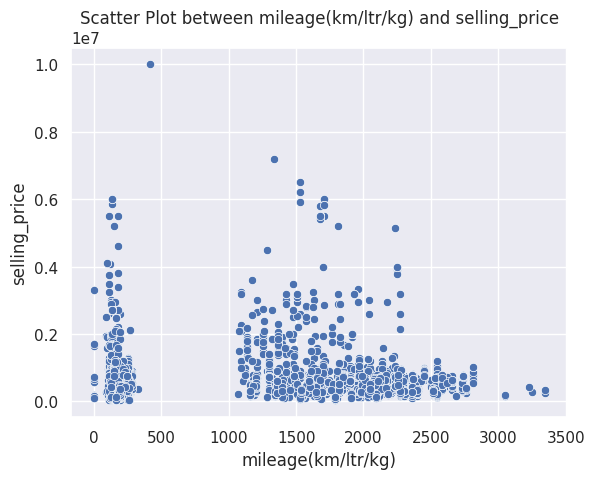

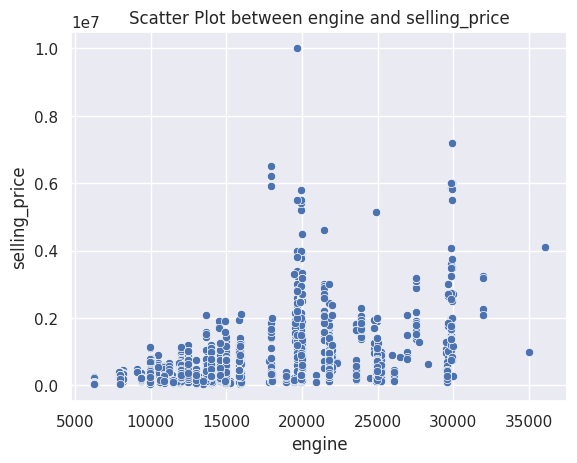

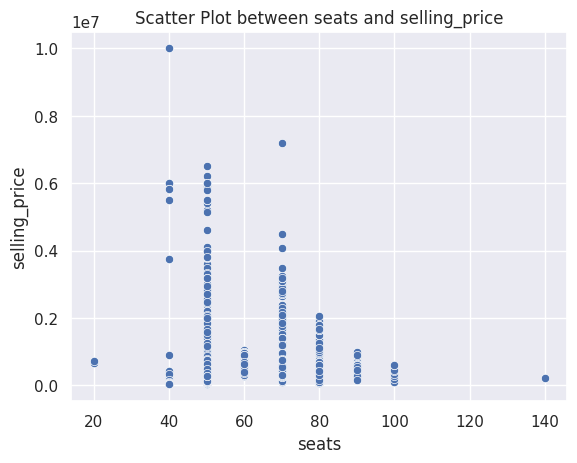

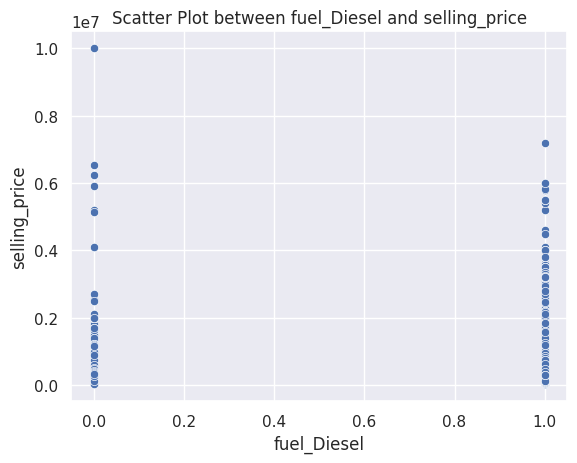

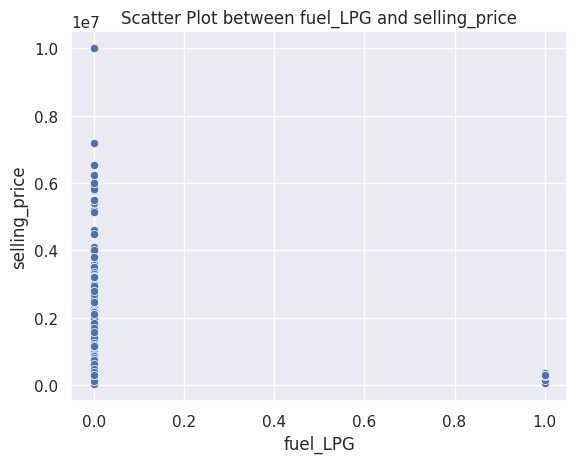

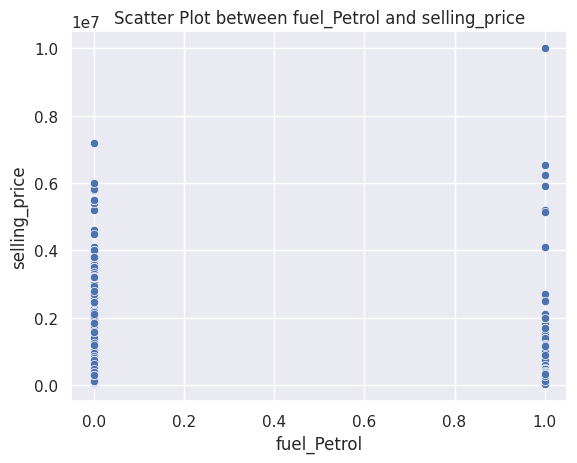

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_cols:
    if column != 'selling_price':
        sns.scatterplot(data=df_new, x=column, y='selling_price')
        plt.title(f"Scatter Plot between {column} and selling_price")
        plt.show()


In [58]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

print(f"size train : x: {X_train.shape}   ->  y: {y_train.shape}")
print(f"size test : x: {X_test.shape}   ->  y: {y_test.shape}")

size train : x: (5534, 10)   ->  y: (5534, 1)
size test : x: (2373, 10)   ->  y: (2373, 1)


In [59]:
def rmse(pred,test):   #root mean square error. finds the error for each prediction -> squaring the error -> mean for the error -> square root
  return np.sqrt(((pred - test) ** 2).mean())

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, max_error,mean_squared_error


# Create and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
rmse_lr = rmse(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)
max_error_lr = max_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Print the results
print(f"rmse : {rmse_lr}")
print(f"r2_score : {r2_score_lr}")
print(f"max_error : {max_error_lr}")
print(f"mean_squared_error : {mse_lr}")


rmse : 0.057304422662287725
r2_score : 0.5171503638823904
max_error : 0.4683188779445765
mean_squared_error : 0.003283796856658115


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score, max_error,mean_squared_error


# Create and train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
rmse_dt = rmse(y_test, y_pred_dt)
r2_score_dt = r2_score(y_test, y_pred_dt)
max_error_dt = max_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print the results
print(f"rmse : {rmse_dt}")
print(f"r2_score : {r2_score_dt}")
print(f"max_error : {max_error_dt}")
print(f"mean_squared_error : {mse_dt}")


rmse : 0.11700810230714374
r2_score : 0.8884214898992047
max_error : 0.9779337033165793
mean_squared_error : 0.0007588307691099547


In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score, max_error,mean_squared_error


knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


rmse_knn = rmse(y_test, y_pred_knn)
r2_score_knn = r2_score(y_test, y_pred_knn)
max_error_knn = max_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"rmse : {rmse_knn}")
print(f"r2_score : {r2_score_knn}")
print(f"max_error : {max_error_knn}")
print(f"mean_squared_error : {mse_knn}")

rmse : 0.020293824292247725
r2_score : 0.9394431303302129
max_error : 0.46148440707277755
mean_squared_error : 0.0004118393044046238


In [63]:
from sklearn.svm import SVR

SVM = SVR()

SVM.fit(X_train, y_train)

y_pred_svm = SVM.predict(X_test)


rmse_svm = rmse(y_test, y_pred_svm)
r2_score_svm = r2_score(y_test, y_pred_svm)
max_error_svm = max_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"rmse : {rmse_svm}")
print(f"r2_score : {r2_score_svm}")
print(f"max_error : {max_error_svm}")
print(f"mean_squared_error : {mse_svm}")

rmse : 0.11780808685782317
r2_score : 0.7483603707005653
max_error : 0.2779244136973951
mean_squared_error : 0.001711368015824338


In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = rmse(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)
max_error_rf = max_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"rmse : {rmse_rf}")
print(f"r2_score : {r2_score_rf}")
print(f"max_error : {max_error_rf}")
print(f"mean_squared_error : {mse_rf}")

rmse : 0.1158764641415352
r2_score : 0.9337957886420862
max_error : 0.593981886260593
mean_squared_error : 0.0004502461323211881


In [65]:
import pandas as pd
value ={
    'meter':["rmse", 'r2_score', 'max_error','mse'],
    'Random Forest': [rmse_rf ,r2_score_rf ,max_error_rf ,mse_rf],
    'SVR': [rmse_svm ,r2_score_svm ,max_error_svm ,mse_svm],
    'KNN': [rmse_knn ,r2_score_knn ,max_error_knn ,mse_knn],
    'Decision Tree': [rmse_dt ,r2_score_dt ,max_error_dt ,mse_dt],
    'Linear Regression': [rmse_lr ,r2_score_lr ,max_error_lr ,mse_lr]
}
Evaluate_model = pd.DataFrame(value)
Evaluate_model

,meter,Random Forest,SVR,KNN,Decision Tree,Linear Regression
0,rmse,0.115876,0.117808,0.020294,0.117008,0.057304
1,r2_score,0.933796,0.748360,0.939443,0.888421,0.517150
2,max_error,0.593982,0.277924,0.461484,0.977934,0.468319
3,mse,0.000450,0.001711,0.000412,0.000759,0.003284


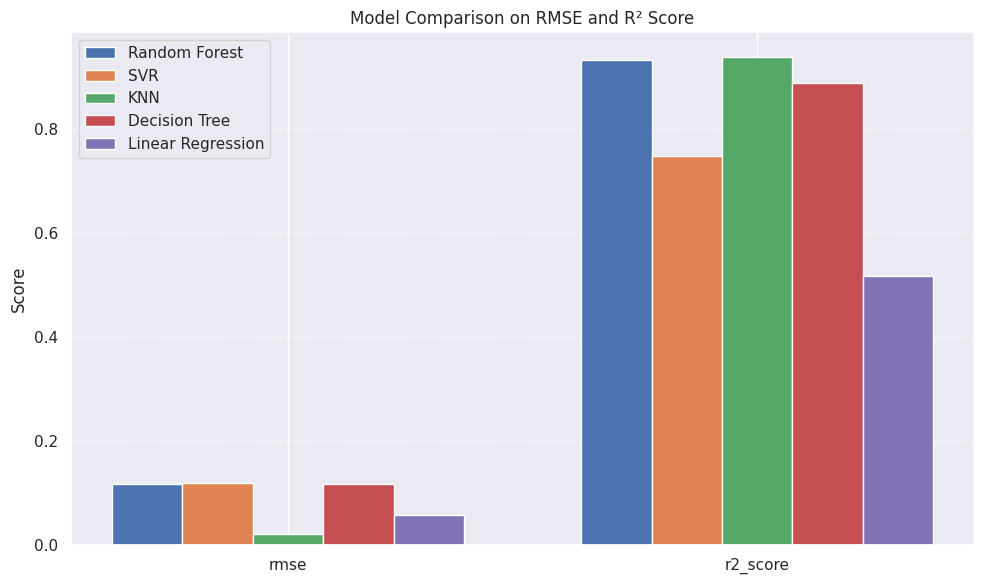

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Selected metrics and indices
metrics = ['rmse', 'r2_score', 'max_error', 'mse']
selected_indices = [0, 1]  # Indices for rmse and r2_score
selected_metrics = [metrics[i] for i in selected_indices]

# Model scores
random_forest = [0.115876, 0.933796, 0.593982, 0.000450]
svr = [0.117808, 0.748360, 0.277924, 0.001711]
knn = [0.020294, 0.939443, 0.461484, 0.000412]
decision_tree = [0.117008, 0.888421, 0.977934, 0.000759]
linear_regression = [0.057304, 0.517150, 0.468319, 0.003284]

# Filter data for rmse and r2_score
random_forest_vals = [random_forest[i] for i in selected_indices]
svr_vals = [svr[i] for i in selected_indices]
knn_vals = [knn[i] for i in selected_indices]
decision_tree_vals = [decision_tree[i] for i in selected_indices]
linear_regression_vals = [linear_regression[i] for i in selected_indices]

# Bar chart setup
x = np.arange(len(selected_metrics))
width = 0.15

plt.figure(figsize=(10, 6))

plt.bar(x - 2*width, random_forest_vals, width, label='Random Forest')
plt.bar(x - width, svr_vals, width, label='SVR')
plt.bar(x, knn_vals, width, label='KNN')
plt.bar(x + width, decision_tree_vals, width, label='Decision Tree')
plt.bar(x + 2*width, linear_regression_vals, width, label='Linear Regression')

# Chart details
plt.xticks(x, selected_metrics)
plt.ylabel('Score')
plt.title('Model Comparison on RMSE and R² Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
